 # A1: Data Curation

The goal of this notebook is to measure Wikipedia traffic from 2008-2019, both on desktop and mobile devices. 

End points used: 
    1. 
<a href="https://wikitech.wikimedia.org/wiki/Analytics/AQS/Legacy_Pagecounts">Legacy pagecounts API</a>
    2. 
<a href="https://wikitech.wikimedia.org/wiki/Analytics/AQS/Pageviews">Pageviews API</a>
        

In [1]:
import json
import requests
from collections import defaultdict
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

In [2]:

endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'

endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'


### Step 1: Data acquisition

In [3]:
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

In [4]:

desktop_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "desktop-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2019090100"
                    }

desktop_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "desktop",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2008010100",
                    "end" : '2019090100'
                        }

mobile_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "mobile-site",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2019090100"
                    }

mobile_app_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-app",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2008010100",
                    "end" : '2019090100'
                        }

mobile_web_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "mobile-web",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2008010100",
                    "end" : '2019090100'
                        }

all_params_legacy = {"project" : "en.wikipedia.org",
                 "access-site" : "all-sites",
                 "granularity" : "monthly",
                 "start" : "2008010100",
                 "end" : "2019090100"
                    }

all_params_pageviews = {"project" : "en.wikipedia.org",
                    "access" : "all-access",
                    "agent" : "user",
                    "granularity" : "monthly",
                    "start" : "2008010100",
                    "end" : '2019090100'
                        }

headers = {
    'User-Agent': 'https://github.com/deepthimhegde',
    'From': 'dhegde@uw.edu'
}

In [5]:
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [6]:
desktop_monthly_pageviews = api_call(endpoint_pageviews, desktop_params_pageviews)
desktop_monthly_legacy = api_call(endpoint_legacy, desktop_params_legacy)

with open('pageviews_desktop_200801-201909.json', 'w') as outfile:
    json.dump(desktop_monthly_pageviews, outfile)
with open('pagecounts_desktop-site_200801-201909.json', 'w') as outfile:
    json.dump(desktop_monthly_legacy, outfile)


In [7]:
print(desktop_monthly_pageviews['items'][0], desktop_monthly_pageviews['items'][-1])
print(desktop_monthly_legacy['items'][0], desktop_monthly_legacy['items'][-1])

{'project': 'en.wikipedia', 'access': 'desktop', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2015070100', 'views': 4376666686} {'project': 'en.wikipedia', 'access': 'desktop', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2019080100', 'views': 2979881198}
{'project': 'en.wikipedia', 'access-site': 'desktop-site', 'granularity': 'monthly', 'timestamp': '2008010100', 'count': 4930902570} {'project': 'en.wikipedia', 'access-site': 'desktop-site', 'granularity': 'monthly', 'timestamp': '2016080100', 'count': 913675893}


In [8]:
mobile_app_monthly_pageviews = api_call(endpoint_pageviews, mobile_app_params_pageviews)
mobile_web_monthly_pageviews = api_call(endpoint_pageviews, mobile_web_params_pageviews)
mobile_monthly_legacy = api_call(endpoint_legacy, mobile_params_legacy)

with open('pageviews_mobile-app_200801-201909.json', 'w') as outfile:
    json.dump(mobile_app_monthly_pageviews, outfile)
with open('pageviews_mobile-web_200801-201909.json', 'w') as outfile:
    json.dump(mobile_web_monthly_pageviews, outfile)
    
with open('pagecounts_mobile-site_200801-201909.json', 'w') as outfile:
    json.dump(mobile_monthly_legacy, outfile)

In [9]:
print(mobile_app_monthly_pageviews['items'][0], mobile_app_monthly_pageviews['items'][-1])
print(mobile_web_monthly_pageviews['items'][0], mobile_app_monthly_pageviews['items'][-1])

print(mobile_monthly_legacy['items'][0], mobile_app_monthly_pageviews['items'][-1])

{'project': 'en.wikipedia', 'access': 'mobile-app', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2015070100', 'views': 109624146} {'project': 'en.wikipedia', 'access': 'mobile-app', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2019080100', 'views': 141066972}
{'project': 'en.wikipedia', 'access': 'mobile-web', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2015070100', 'views': 3179131148} {'project': 'en.wikipedia', 'access': 'mobile-app', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2019080100', 'views': 141066972}
{'project': 'en.wikipedia', 'access-site': 'mobile-site', 'granularity': 'monthly', 'timestamp': '2014100100', 'count': 3091546685} {'project': 'en.wikipedia', 'access': 'mobile-app', 'agent': 'user', 'granularity': 'monthly', 'timestamp': '2019080100', 'views': 141066972}


### Step 2: Data Processing

In [10]:
def get_year(time_stamp):
    return int(time_stamp[:4])

def get_month(time_stamp):
    return int(time_stamp[4:6])

def yyyymm(time_stamp):
    return str(get_year(time_stamp)) + str(get_month(time_stamp)).rjust(2, "0")

In [11]:
def make_dict(data, dict_):
    for each in data['items']:
        key = yyyymm(each['timestamp'])
        if 'views' in each:
            dict_[key] += each['views']
        else:
            dict_[key] += each['count']
            
def make_df(d, value_key):
    return pd.DataFrame({'yyyymm': list(d.keys()), value_key: list(d.values())})

In [12]:
pageviews_mobile = defaultdict(int)
pageviews_desktop = defaultdict(int)
pagecounts_mobile = defaultdict(int)
pagecounts_desktop = defaultdict(int)

make_dict(mobile_app_monthly_pageviews, pageviews_mobile)
make_dict(mobile_web_monthly_pageviews, pageviews_mobile)
make_dict(desktop_monthly_pageviews, pageviews_desktop)

make_dict(desktop_monthly_legacy, pagecounts_desktop)
make_dict(mobile_monthly_legacy, pagecounts_mobile)


pageviews_mobile_df = make_df(pageviews_mobile, 'pageview_mobile')
pageviews_desktop_df = make_df(pageviews_desktop, 'pageview_desktop')
pagecounts_mobile_df = make_df(pagecounts_mobile, 'pagecount_mobile')
pagecounts_desktop_df = make_df(pagecounts_desktop, 'pagecount_desktop')

In [13]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['yyyymm'],how='outer'), [pageviews_mobile_df, pageviews_desktop_df, pagecounts_mobile_df, pagecounts_desktop_df])

In [14]:
#df_merged

In [15]:
df_merged.fillna(0, inplace=True)

In [16]:
#df_merged

In [17]:
df_merged['pagecount_total'] = df_merged['pagecount_mobile'] + df_merged['pagecount_desktop']
df_merged['pageview_total'] = df_merged['pageview_mobile'] + df_merged['pageview_desktop']
df_merged['year'] = df_merged.yyyymm.apply(get_year)
df_merged['month'] = df_merged.yyyymm.apply(get_month)

In [18]:
df_merged.to_csv('en-wikipedia_traffic_200712-201809.csv', index=False)

### Step 3: Analysis

<Figure size 432x288 with 0 Axes>

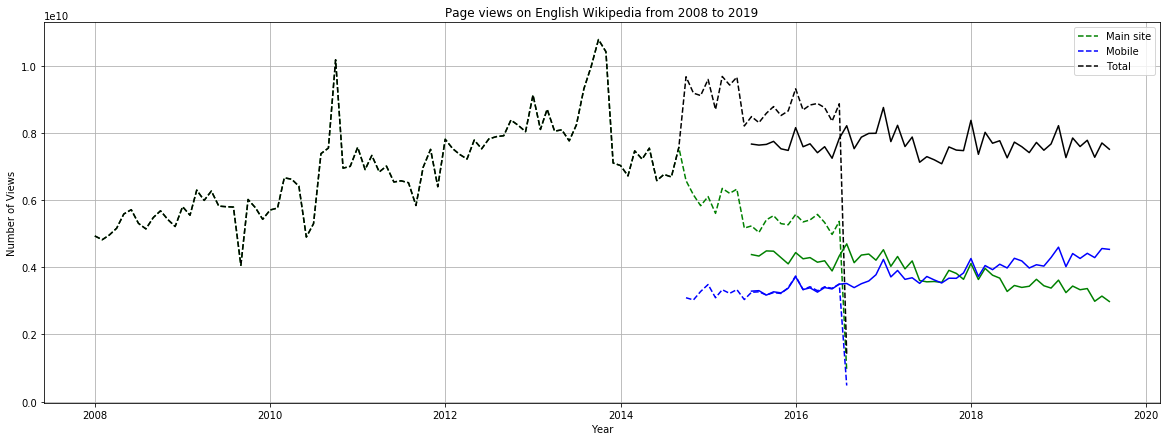

In [23]:
%matplotlib inline
fig = plt.figure()

df = pd.read_csv('en-wikipedia_traffic_200712-201809.csv')
df = df.replace(to_replace=0, value=pd.np.nan)
df['date'] = df.apply(lambda l: pd.datetime(int(l.year), int(l.month), 1), axis=1)
df = df.sort_values('date')
plt.figure(figsize=(20, 7))

plt.plot(df.date, df.pagecount_desktop, '--g')
plt.plot(df.date, df.pagecount_mobile, '--b')
plt.plot(df.date, df.pagecount_total, '--k')

plt.plot(df.date, df.pageview_desktop, '-g')
plt.plot(df.date, df.pageview_mobile, '-b')
plt.plot(df.date, df.pageview_total, '-k')


ymin, ymax = plt.ylim()

plt.legend(['Main site', 'Mobile', 'Total'])

plt.title("Page views on English Wikipedia from 2008 to 2019")
plt.xlabel("Year")
plt.ylabel("Number of Views")
plt.grid()
plt.show()